In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
from tqdm.notebook import tqdm

print("[INFO] Imports Done")

[INFO] Imports Done


##Download dataset

In [2]:
## Install Kaggle library
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

## 1) Upload kaggle API key file
from google.colab import files
uploaded = files.upload()

## 2) Auth with our Kaggle Account
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

## 3) Download Dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
!unzip -q *.zip 

print("[INFO] DATASET READY")

Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.6MB 4.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=f8e94b89e56fc9b250263495e11d25af05c436e53debf1aff24c8dda368d8aaa
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make su

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 3.58G/3.58G [01:21<00:00, 93.3MB/s]
100% 3.58G/3.58G [01:21<00:00, 47.0MB/s]
[INFO] DATASET READY


##Image Preprocessing

#Training Set

In [3]:
TRAIN_DIR = "/content/dataset/train/*"


fruit_images = []
labels = [] 
for fruit_dir_path in tqdm(glob.glob(TRAIN_DIR), desc = "Image Preprocessing"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in tqdm(glob.glob(os.path.join(fruit_dir_path, "*.png")), desc = "Preprocessing imaes from " + fruit_label):
      
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
  
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
fruit_images = fruit_images.reshape(len(fruit_images),-1)
labels = np.array(labels)

print("[INFO] Image Preprocessing Done")



[INFO] Image Preprocessing Done


In [4]:
N_TRAIN_IMAGES = np.shape(fruit_images)[0]

print("image array length:",len(fruit_images[0]))
print("total number of images:", N_TRAIN_IMAGES)
print("labels:", labels)

image array length: 12100
total number of images: 10901
labels: ['rottenoranges' 'rottenoranges' 'rottenoranges' ... 'freshapples'
 'freshapples' 'freshapples']


#Validation Set

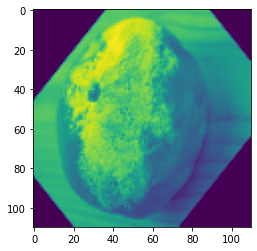

[INFO] VALIDATION LABELS READY


In [5]:
TEST_DIR = "/content/dataset/test/*"


validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in tqdm(glob.glob(TEST_DIR), desc="Preprocessiing training images"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in tqdm(glob.glob(os.path.join(fruit_dir_path, "*.png")), desc = "Preprocessing images from " + fruit_label):

        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
plt.imshow(validation_fruit_images[3])
plt.show()

validation_fruit_images = validation_fruit_images.reshape(len(validation_fruit_images),-1)
validation_labels = np.array(validation_labels)

print("[INFO] VALIDATION SET READY")

In [6]:
N_VALIDATION_IMAGES = np.shape(validation_fruit_images)[0]

print("validation image array length:",len(validation_fruit_images[0]))
print("validation total number of images:", N_VALIDATION_IMAGES)

validation image array length: 12100
validation total number of images: 2698


##Training the model

In [9]:
from sklearn.ensemble import RandomForestClassifier

print("Training the model...")
clf = RandomForestClassifier(max_depth=20, random_state=0, verbose = 0, n_estimators = 10)
clf.fit(fruit_images, labels) 

print("[INFO] Model trained")

Training the model...
[INFO] Model trained


##Predicting from validation set

In [10]:
for i in range(1,N_VALIDATION_IMAGES,100):
    prediction = clf.predict([validation_fruit_images[i]])
    print(f"Predicted value: {prediction} || Actual value: {validation_labels[i]} || Correct?: {prediction[0] == validation_labels[i]}")

Predicted value: ['rottenoranges'] || Actual value: rottenoranges || Correct?: True
Predicted value: ['rottenoranges'] || Actual value: rottenoranges || Correct?: True
Predicted value: ['rottenoranges'] || Actual value: rottenoranges || Correct?: True
Predicted value: ['rottenoranges'] || Actual value: rottenoranges || Correct?: True
Predicted value: ['rottenoranges'] || Actual value: rottenoranges || Correct?: True
Predicted value: ['freshoranges'] || Actual value: freshoranges || Correct?: True
Predicted value: ['freshoranges'] || Actual value: freshoranges || Correct?: True
Predicted value: ['freshoranges'] || Actual value: freshoranges || Correct?: True
Predicted value: ['freshbanana'] || Actual value: freshbanana || Correct?: True
Predicted value: ['freshbanana'] || Actual value: freshbanana || Correct?: True
Predicted value: ['freshbanana'] || Actual value: freshbanana || Correct?: True
Predicted value: ['freshbanana'] || Actual value: freshbanana || Correct?: True
Predicted valu

##Finding the accuracy of model

In [ ]:
n_correct = 0 
total = N_VALIDATION_IMAGES

for i in tqdm(range(total), desc = "Predicting"):
    prediction = clf.predict([validation_fruit_images[i]])
    if prediction[0] == validation_labels[i] :
        n_correct += 1
print("Accuracy is ", n_correct / total)


Accuracy is  0.8106004447739066


In [12]:
print("Accuracy of the model is :", clf.score(validation_fruit_images, validation_labels))

Accuracy of the model is : 0.8146775389177169
